In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("C:\\Users\\soura\\Documents\\DS_ML_assignments/laptops_dataset_final_600.csv")
df.head()

,product_name,overall_rating,no_ratings,no_reviews,rating,title,review
0,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Perfect product!,"Loved it, it's my first MacBook that I earned ..."
1,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Fabulous!,Battery lasted longer than my first relationsh...
2,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Fabulous!,Such a great deal.. very happy with the perfor...
3,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,4,Delightful,"Awesome build quality and very good display, b..."
4,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Awesome,When i ordered and came to know about seller r...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24113 entries, 0 to 24112
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_name    24113 non-null  object 
 1   overall_rating  24113 non-null  float64
 2   no_ratings      24113 non-null  object 
 3   no_reviews      24113 non-null  object 
 4   rating          24113 non-null  int64  
 5   title           24113 non-null  object 
 6   review          24113 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.3+ MB


In [11]:
df.isnull().sum()

product_name      0
overall_rating    0
no_ratings        0
no_reviews        0
rating            0
title             0
review            0
dtype: int64

In [19]:
df_new=df.drop(['product_name','overall_rating','no_ratings','no_reviews','title'], axis=1)
df_new.head()

,rating,review
0,5,"Loved it, it's my first MacBook that I earned ..."
1,5,Battery lasted longer than my first relationsh...
2,5,Such a great deal.. very happy with the perfor...
3,4,"Awesome build quality and very good display, b..."
4,5,When i ordered and came to know about seller r...


In [21]:
df_new['rating'].value_counts()

rating
5    13972
4     5629
3     2035
1     1809
2      668
Name: count, dtype: int64

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

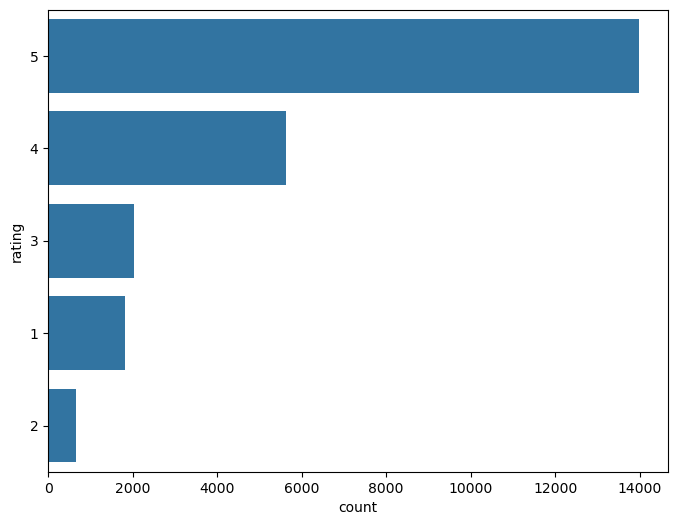

In [39]:
plt.figure(figsize=(8,6))
sns.countplot(y='rating', data=df_new, order = df_new['rating'].value_counts().index)
plt.show()

In [41]:
import re
def cleanReview(reviewText):
    reviewText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', reviewText)  # remove punctuations
    reviewText = re.sub(r'[^\x00-\x7f]',r' ', reviewText) # remove non-ascii characters
    reviewText = re.sub('\s+', ' ', reviewText)  # remove extra whitespace
    reviewText = re.sub(r'[0-9]+', '', reviewText)  #remove numbers
    return reviewText.lower()

df_new["Cleaned_Review"] = df_new["review"].apply(lambda x: cleanReview(x))
df_new.head()

<>:3: SyntaxWarning: invalid escape sequence '\]'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\]'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\soura\AppData\Local\Temp\ipykernel_9812\2410776394.py:3: SyntaxWarning: invalid escape sequence '\]'
  reviewText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', reviewText)  # remove punctuations
C:\Users\soura\AppData\Local\Temp\ipykernel_9812\2410776394.py:5: SyntaxWarning: invalid escape sequence '\s'
  reviewText = re.sub('\s+', ' ', reviewText)  # remove extra whitespace


,rating,review,Cleaned_Review
0,5,"Loved it, it's my first MacBook that I earned ...",loved it it s my first macbook that i earned f...
1,5,Battery lasted longer than my first relationsh...,battery lasted longer than my first relationsh...
2,5,Such a great deal.. very happy with the perfor...,such a great deal very happy with the performa...
3,4,"Awesome build quality and very good display, b...",awesome build quality and very good display ba...
4,5,When i ordered and came to know about seller r...,when i ordered and came to know about seller r...


In [43]:
pd.set_option('max_colwidth', 800000)

In [45]:
df_new.head()

,rating,review,Cleaned_Review
0,5,"Loved it, it's my first MacBook that I earned from my hardwork 🥺❤️",loved it it s my first macbook that i earned from my hardwork
1,5,Battery lasted longer than my first relationship (2 days).\nListening to Arijit singh songs on full volume since then still isn't getting over. Has more warmth than her. unlike her there's two way communication here as touchpad is very responsive. fingerprint lock is nice as it only opens up to me. 5 stars for this -1 for her,battery lasted longer than my first relationship days listening to arijit singh songs on full volume since then still isn t getting over has more warmth than her unlike her there s two way communication here as touchpad is very responsive fingerprint lock is nice as it only opens up to me stars for this for her
2,5,Such a great deal.. very happy with the performance and battery life..Origional product..🥰❤️\nThank you Flipkart..!!!,such a great deal very happy with the performance and battery life origional product thank you flipkart
3,4,"Awesome build quality and very good display, battery and camera. Still new to macOS",awesome build quality and very good display battery and camera still new to macos
4,5,"When i ordered and came to know about seller review,i was scared that in what condition i will get macbook. but i was wrong.\n\nThis is my first macbook and i am fully satisfied with the product with original packaging of apple and got genuine product.\n\nIt's very thin and light and looks very premium.\n\nAs A software developer, i installed intellij idea ide and guess what.\nIt's magic,it is opening just in a click and within 5 seconds.\nGreat performance, no heating issue, sound quality awesome an...\nREAD MORE",when i ordered and came to know about seller review i was scared that in what condition i will get macbook but i was wrong this is my first macbook and i am fully satisfied with the product with original packaging of apple and got genuine product it s very thin and light and looks very premium as a software developer i installed intellij idea ide and guess what it s magic it is opening just in a click and within seconds great performance no heating issue sound quality awesome an read more


In [47]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_new['Labels']=encoder.fit_transform(df_new["rating"])
df_new.head()

,rating,review,Cleaned_Review,Labels
0,5,"Loved it, it's my first MacBook that I earned from my hardwork 🥺❤️",loved it it s my first macbook that i earned from my hardwork,4
1,5,Battery lasted longer than my first relationship (2 days).\nListening to Arijit singh songs on full volume since then still isn't getting over. Has more warmth than her. unlike her there's two way communication here as touchpad is very responsive. fingerprint lock is nice as it only opens up to me. 5 stars for this -1 for her,battery lasted longer than my first relationship days listening to arijit singh songs on full volume since then still isn t getting over has more warmth than her unlike her there s two way communication here as touchpad is very responsive fingerprint lock is nice as it only opens up to me stars for this for her,4
2,5,Such a great deal.. very happy with the performance and battery life..Origional product..🥰❤️\nThank you Flipkart..!!!,such a great deal very happy with the performance and battery life origional product thank you flipkart,4
3,4,"Awesome build quality and very good display, battery and camera. Still new to macOS",awesome build quality and very good display battery and camera still new to macos,3
4,5,"When i ordered and came to know about seller review,i was scared that in what condition i will get macbook. but i was wrong.\n\nThis is my first macbook and i am fully satisfied with the product with original packaging of apple and got genuine product.\n\nIt's very thin and light and looks very premium.\n\nAs A software developer, i installed intellij idea ide and guess what.\nIt's magic,it is opening just in a click and within 5 seconds.\nGreat performance, no heating issue, sound quality awesome an...\nREAD MORE",when i ordered and came to know about seller review i was scared that in what condition i will get macbook but i was wrong this is my first macbook and i am fully satisfied with the product with original packaging of apple and got genuine product it s very thin and light and looks very premium as a software developer i installed intellij idea ide and guess what it s magic it is opening just in a click and within seconds great performance no heating issue sound quality awesome an read more,4


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

X = df_new["Cleaned_Review"]
y = df_new.Labels
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24113,)
(24113,)
(18084,)
(6029,)
(18084,)
(6029,)


In [65]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(X_train)

# learn training data vocabulary, then use it to create a document-term matrix
X_train_dtm = vect.transform(X_train)

# equivalently: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)


# examine the document-term matrix
print(type(X_train_dtm), X_train_dtm.shape)

# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
print(type(X_test_dtm), X_test_dtm.shape)

<class 'scipy.sparse._csr.csr_matrix'> (18084, 6430)
<class 'scipy.sparse._csr.csr_matrix'> (6029, 6430)


In [67]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

<18084x6430 sparse matrix of type '<class 'numpy.float64'>'
	with 247904 stored elements in Compressed Sparse Row format>

In [69]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
from sklearn import metrics

# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred_class))

=======Accuracy Score===========
0.6881738265052247


In [71]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()), 
                 ('tfid', TfidfTransformer()),  
                 ('model', MultinomialNB())])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred))

=======Accuracy Score===========
0.6239840769613535


In [73]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')

# train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)

# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred_class))

CPU times: total: 2.22 s
Wall time: 823 ms
=======Accuracy Score===========
0.6881738265052247
